In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

In [82]:
# X,Y=make_blobs?
X,Y=make_moons?

In [83]:
# X,Y=make_blobs(n_samples=500,centers=2,n_features=2,random_state=10)
X,Y=make_moons(n_samples=500, shuffle=True, noise=0.2, random_state=1)
print(X.shape,Y.shape)

(500, 2) (500,)


<ipython-input-84-bd9c19bdfe0e>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


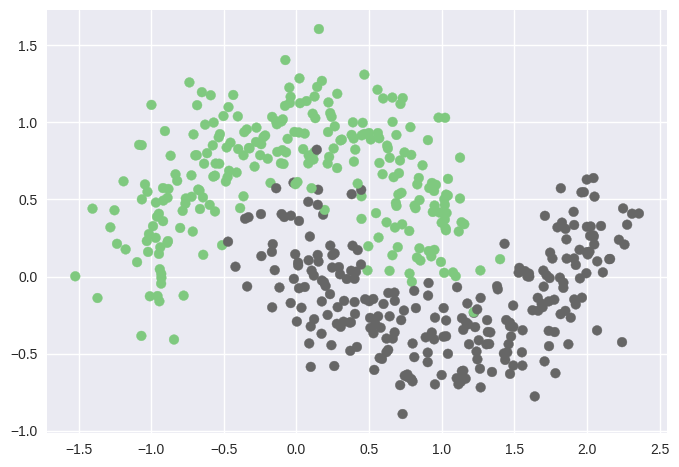

In [84]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

In [85]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

def predict(X,weights):
  """x->mx(n+1) matrix weights->(n+1,) vector"""
  z=np.dot(X,weights)
  predictions=sigmoid(z)
  return predictions

def loss(X,Y,weights):
  Y_=predict(X,weights)
  cost=np.mean(-Y*np.log(Y_)-((1-Y)*np.log(1-Y_)))
  return cost

def update(X,Y,weights,learning_rate):
  Y_=predict(X,weights)
  dw=np.dot(X.T,Y_-Y)
  m=X.shape[0]
  weights=weights-learning_rate*dw/(float(m))
  return weights

def train(X,Y,learning_rate=0.5,max_epochs=100):
  ones=np.ones((X.shape[0],1))
  X=np.hstack((ones,X))
  weights=np.zeros(X.shape[1])
  for epoch in range(max_epochs):
    weights=update(X,Y,weights,learning_rate)
    if epoch%10==0:
      l=loss(X,Y,weights)
      print("Epoch %d Loss %.4f"%(epoch,l))

  return weights


In [86]:
weights=train(X,Y,max_epochs=100)

Epoch 0 Loss 0.6462
Epoch 10 Loss 0.4469
Epoch 20 Loss 0.3866
Epoch 30 Loss 0.3574
Epoch 40 Loss 0.3396
Epoch 50 Loss 0.3274
Epoch 60 Loss 0.3184
Epoch 70 Loss 0.3114
Epoch 80 Loss 0.3059
Epoch 90 Loss 0.3013


In [87]:
def get_predictions(x_test,weights,labels=True):
  if(x_test.shape[1]!=weights.shape[0]):
    ones=np.ones((x_test.shape[0],1))
    x_test=np.hstack((ones,x_test))
  probs=predict(x_test,weights)

  if not labels:
    return probs
  else:
    labels=np.zeros(probs.shape)
    labels[probs>=0.5]=1
    return labels

In [88]:
x1=np.linspace(-9,9,10)
x2=-(weights[0]+weights[1]*x1)/weights[2]

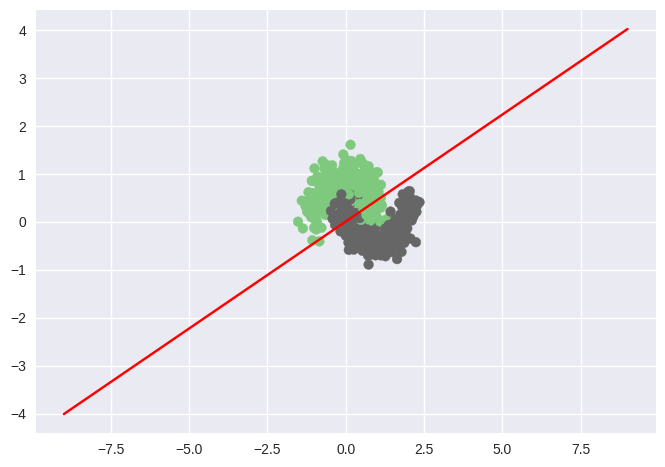

In [89]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.plot(x1,x2,c='red')
plt.show()

In [90]:
Y_=get_predictions(X,weights,labels=True)
training_accuracy=np.sum(Y_==Y)/Y.shape[0]
print(training_accuracy)

0.864
